In [12]:
import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd

In [13]:
amazon = quandl.get("WIKI/AMZN/",api_key="sd6LUssCVKzGGJFutdr6")
amazon = pd.DataFrame(amazon)
amazon.head()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [14]:
amazon.info()
column4 = ["Open","Close","High","Low"]
amazon[column4] = amazon[column4]/10
columns= ["Open","High","Low","Close","Adj. Close"]
columns1 =["Split Ratio","Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5248 entries, 1997-05-16 to 2018-03-27
Data columns (total 12 columns):
Open           5248 non-null float64
High           5248 non-null float64
Low            5248 non-null float64
Close          5248 non-null float64
Volume         5248 non-null float64
Ex-Dividend    5248 non-null float64
Split Ratio    5248 non-null float64
Adj. Open      5248 non-null float64
Adj. High      5248 non-null float64
Adj. Low       5248 non-null float64
Adj. Close     5248 non-null float64
Adj. Volume    5248 non-null float64
dtypes: float64(12)
memory usage: 533.0 KB


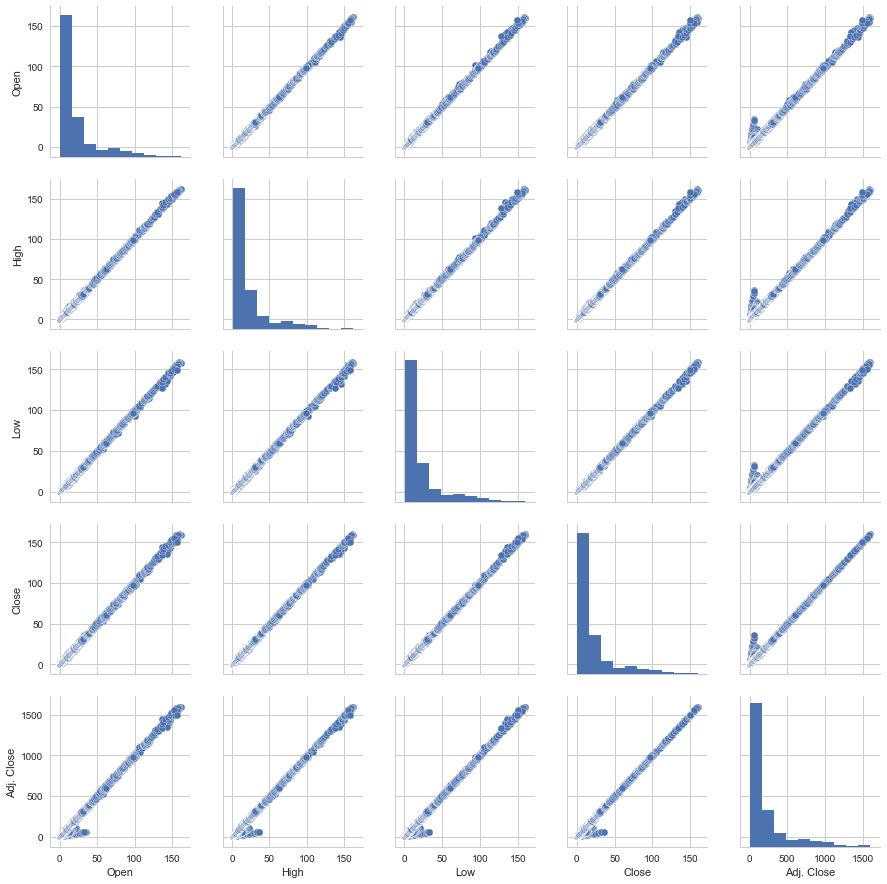

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context= 'notebook')
sns.pairplot(amazon[columns],size=2.5)
plt.show()


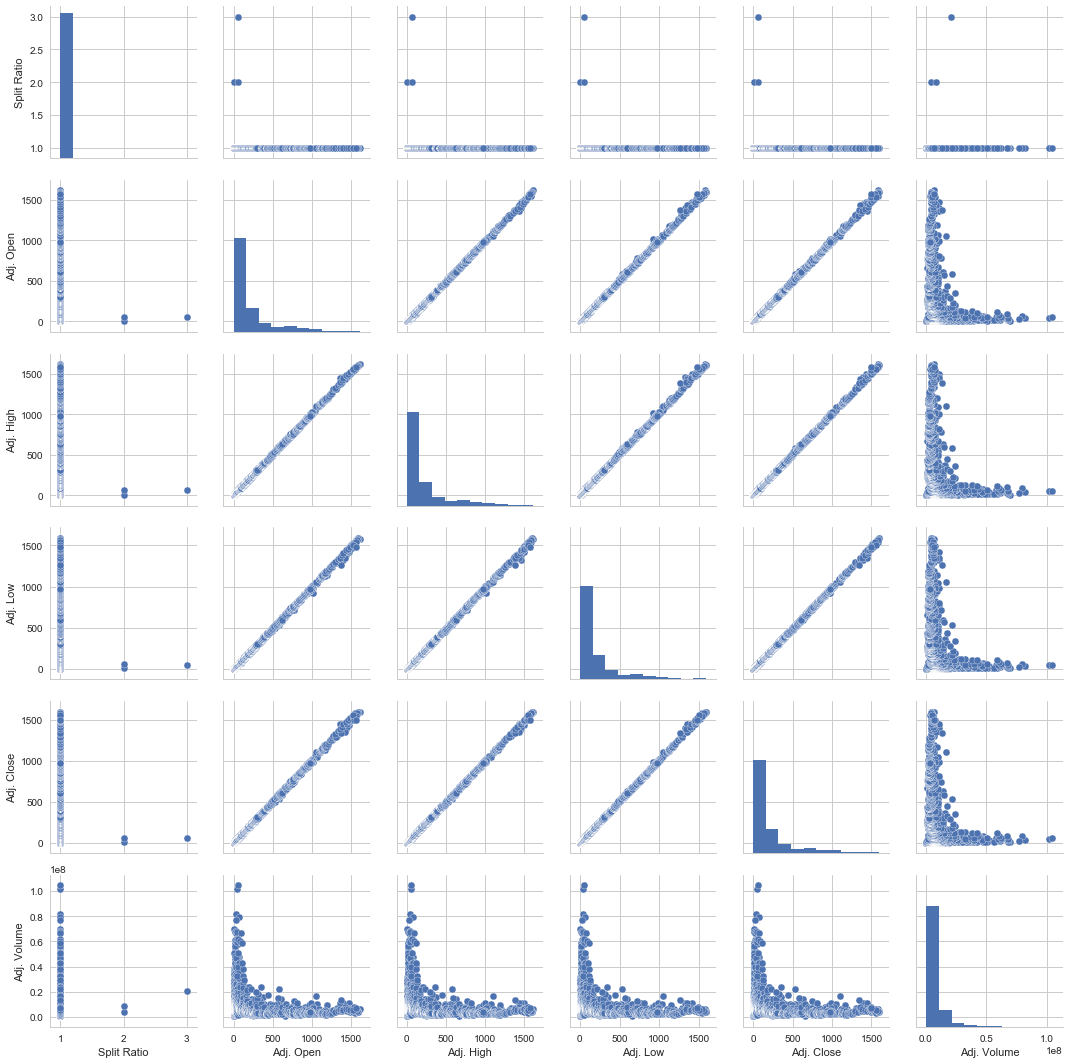

In [16]:
sns.set(style='whitegrid', context= 'notebook')
sns.pairplot(amazon[columns1],size=2.5)
plt.show()

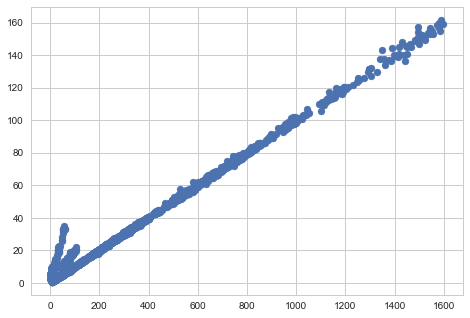

In [17]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(amazon['Adj. Close'],amazon['Open'])
plt.show()

In [18]:
from sklearn.neighbors import LocalOutlierFactor

In [19]:
amazon.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,2.238,2.375,2.050,2.075,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,2.050,2.125,1.950,2.050,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,2.075,2.100,1.963,1.963,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,1.925,1.975,1.650,1.713,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,1.725,1.738,1.575,1.675,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [20]:
columns_used=["Open","Close","High","Low","Adj. Open","Adj. High","Adj. Low"]
X=amazon[columns_used]
y= amazon["Adj. Close"]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [22]:
lr =LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [25]:
y_train_pred= lr.predict(x_train)
y_test_pred= lr.predict(x_test)
print(lr.score(x_test,y_test))

0.9999965875589129


In [ ]:
import math
from sklearn.metrics import mean_squared_error
a =   mean_squared_error(y_train, y_train_pred)
b =    mean_squared_error(y_test,y_test_pred)
print((1-(math.sqrt(a)))*100,((1-math.sqrt(b))*100))

In [ ]:
svr_rbf_confidence=svr_rbf.score(x_test,y_test)
print(f"SVR Confidence: {round(svr_rbf_confidence*100,2)}%")